In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fanalysis.pca import PCA
# matplotlib inline

df=pd.read_csv("my_courses.csv",encoding="latin",sep = ";")
df

,titreCours,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
0,Classez_et_segmentez_des_donnÌ©es_visuelles,29,34,NaN,15,3,11,0.666667,3,22,4470531
1,Initiez-vous_ÌÊ_la_statistique_infÌ©rentielle,55,4,86.0,12,2,21,0.750000,4,8,4525306
2,DÌ©couvrez_les_librairies_Python_pour_la_Data_...,64,64,96.0,10,2,8,0.000000,2,57,4452741
3,Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6,1,12,1.000000,3,29,3595541
4,Initiez-vous_ÌÊ_l'algÌ¬bre_relationnelle_avec_...,192,14,92.0,20,2,25,0.500000,4,25,4449026
5,EntraÌ¨nez_un_modÌ¬le_prÌ©dictif_linÌ©aire,193,65,84.0,10,2,9,0.500000,2,182,4444646
6,Explorez_vos_donnÌ©es_avec_des_algorithmes_non...,193,75,85.0,15,3,13,0.666667,3,22,4379436
7,DÌ©crivez_et_nettoyez_votre_jeu_de_donnÌ©es,195,3,95.0,15,2,24,0.750000,4,13,4525266
8,CrÌ©ez_votre_Data_Lake,203,44,89.0,8,2,7,0.500000,2,186,4467481
9,DÌ©veloppez_une_application_iPhone_avec_le_mod...,218,3,94.0,30,2,20,0.750000,4,61,4504796


In [147]:
df["moyenneDeClasse"].fillna(df["moyenneDeClasse"].mean(),inplace = True)
print(df)

                                           titreCours  inscription  \
0         Classez_et_segmentez_des_donnÌ©es_visuelles           29   
1       Initiez-vous_ÌÊ_la_statistique_infÌ©rentielle           55   
2   DÌ©couvrez_les_librairies_Python_pour_la_Data_...           64   
3                   Devenez_mentor_sur_OpenClassrooms           76   
4   Initiez-vous_ÌÊ_l'algÌ¬bre_relationnelle_avec_...          192   
5          EntraÌ¨nez_un_modÌ¬le_prÌ©dictif_linÌ©aire          193   
6   Explorez_vos_donnÌ©es_avec_des_algorithmes_non...          193   
7         DÌ©crivez_et_nettoyez_votre_jeu_de_donnÌ©es          195   
8                              CrÌ©ez_votre_Data_Lake          203   
9   DÌ©veloppez_une_application_iPhone_avec_le_mod...          218   
10                  Animez_un_atelier_de_crÌ©ativitÌ©          242   
11               Faites_une_base_de_donnÌ©es_avec_UML          272   
12                   Apprenez_ÌÊ_programmer_en_Python          349   
13  RÌ©alisez_des_ca

                                                    inscription  progression  \
titreCours                                                                     
Classez_et_segmentez_des_donnÌ©es_visuelles                  29           34   
Initiez-vous_ÌÊ_la_statistique_infÌ©rentielle                55            4   
DÌ©couvrez_les_librairies_Python_pour_la_Data_S...           64           64   
Devenez_mentor_sur_OpenClassrooms                            76          100   
Initiez-vous_ÌÊ_l'algÌ¬bre_relationnelle_avec_l...          192           14   
EntraÌ¨nez_un_modÌ¬le_prÌ©dictif_linÌ©aire                  193           65   
Explorez_vos_donnÌ©es_avec_des_algorithmes_non_...          193           75   
DÌ©crivez_et_nettoyez_votre_jeu_de_donnÌ©es                 195            3   
CrÌ©ez_votre_Data_Lake                                      203           44   
DÌ©veloppez_une_application_iPhone_avec_le_modÌ...          218            3   
Animez_un_atelier_de_crÌ©ativitÌ©       

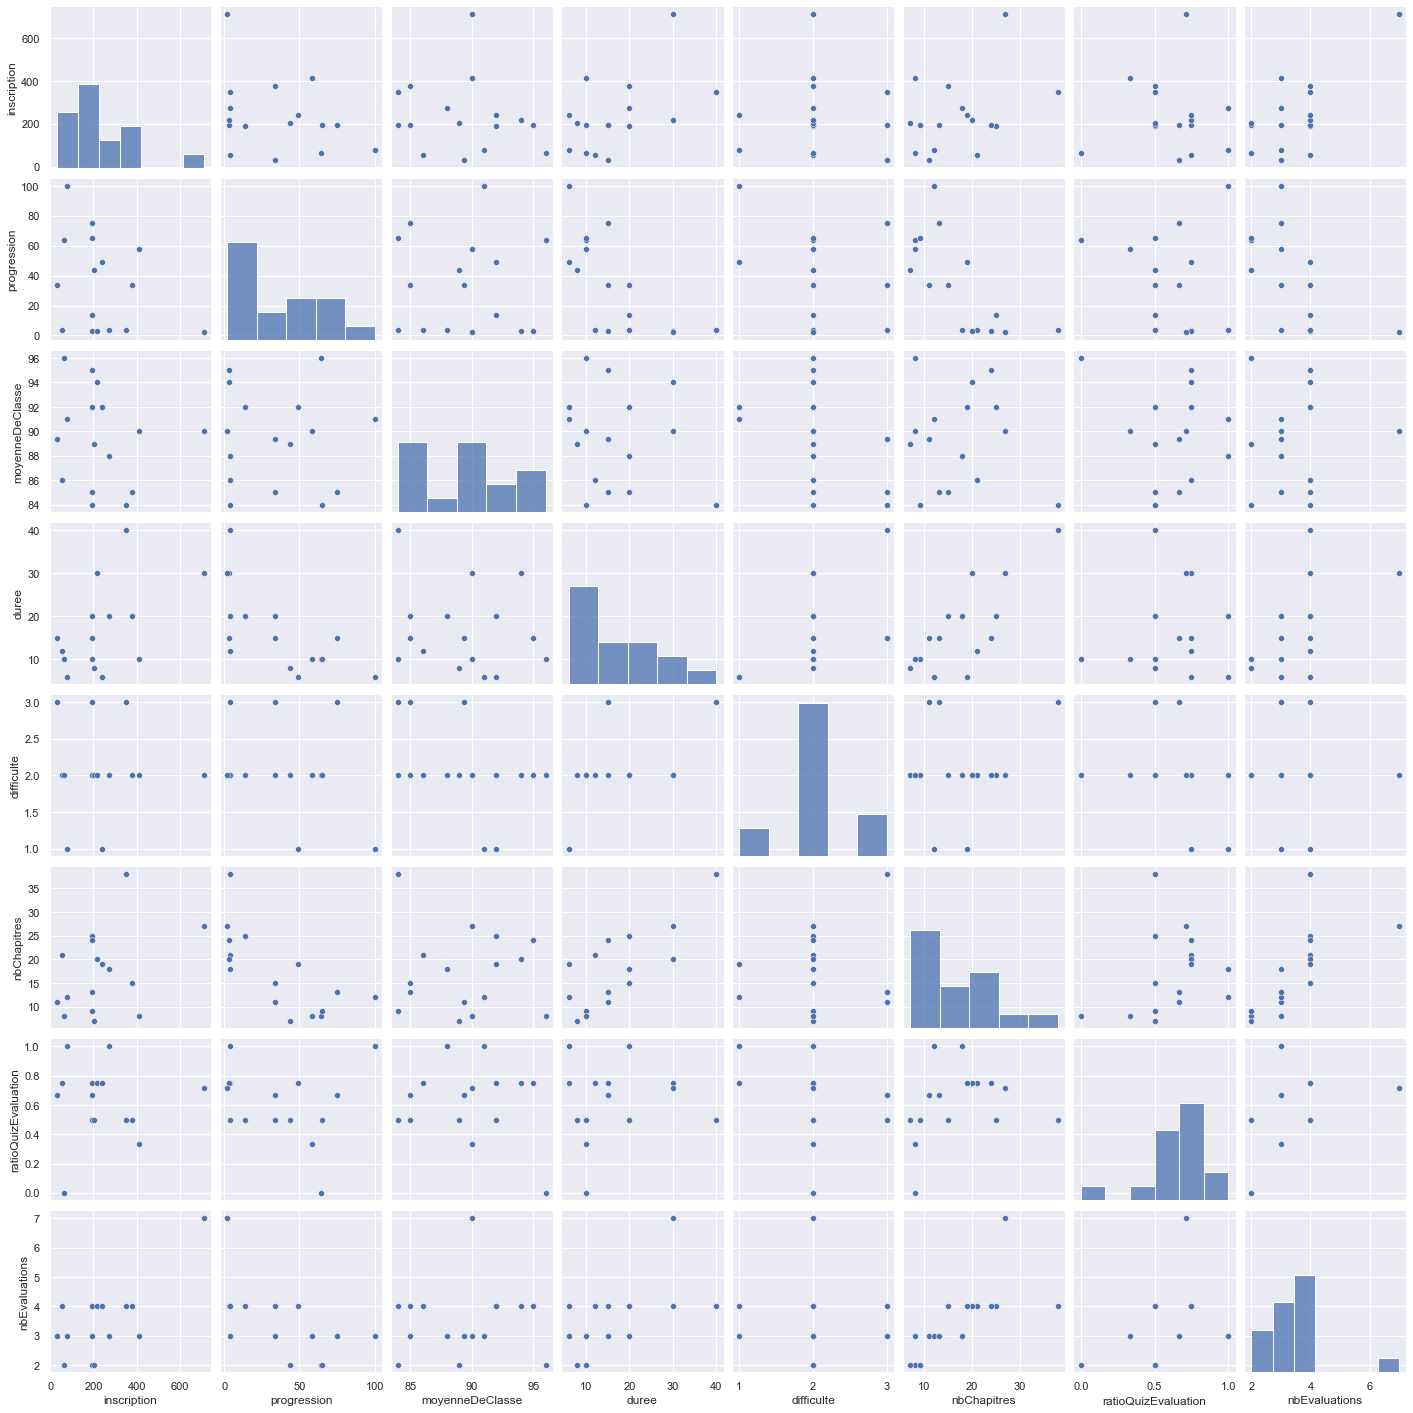

In [148]:
df_l = df.drop(["idCours","derniereMiseAJour"], axis=1)
df_l = df_l.set_index(['titreCours'])
print(df_l)
sns.pairplot(df_l)

<AxesSubplot:>

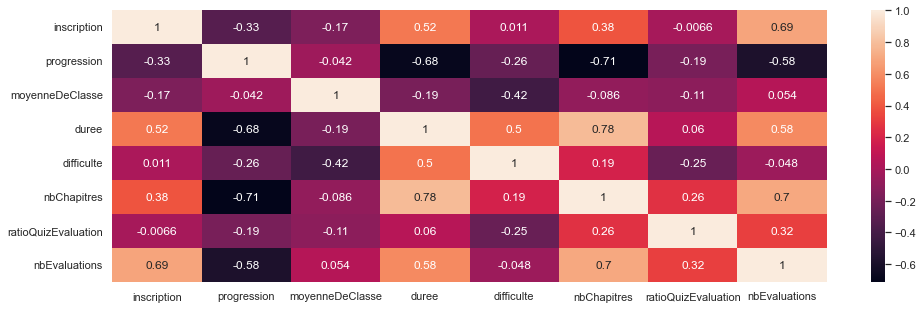

In [149]:
corr = df_l.corr()
sns.heatmap(corr,annot=True)

In [150]:
X = df_l.iloc[:, 0:7].values
X

array([[2.90000000e+01, 3.40000000e+01, 8.94000000e+01, 1.50000000e+01,
        3.00000000e+00, 1.10000000e+01, 6.66666667e-01],
       [5.50000000e+01, 4.00000000e+00, 8.60000000e+01, 1.20000000e+01,
        2.00000000e+00, 2.10000000e+01, 7.50000000e-01],
       [6.40000000e+01, 6.40000000e+01, 9.60000000e+01, 1.00000000e+01,
        2.00000000e+00, 8.00000000e+00, 0.00000000e+00],
       [7.60000000e+01, 1.00000000e+02, 9.10000000e+01, 6.00000000e+00,
        1.00000000e+00, 1.20000000e+01, 1.00000000e+00],
       [1.92000000e+02, 1.40000000e+01, 9.20000000e+01, 2.00000000e+01,
        2.00000000e+00, 2.50000000e+01, 5.00000000e-01],
       [1.93000000e+02, 6.50000000e+01, 8.40000000e+01, 1.00000000e+01,
        2.00000000e+00, 9.00000000e+00, 5.00000000e-01],
       [1.93000000e+02, 7.50000000e+01, 8.50000000e+01, 1.50000000e+01,
        3.00000000e+00, 1.30000000e+01, 6.66666667e-01],
       [1.95000000e+02, 3.00000000e+00, 9.50000000e+01, 1.50000000e+01,
        2.00000000e+00, 2

In [151]:
my_pca = PCA(std_unit=True, row_labels=df_l.index.values, col_labels=df_l.columns.values[0:7])


In [152]:
my_pca.fit(X)

PCA(col_labels=array(['inscription', 'progression', 'moyenneDeClasse', 'duree',
       'difficulte', 'nbChapitres', 'ratioQuizEvaluation'], dtype=object),
    row_labels=array(['Classez_et_segmentez_des_donnÌ©es_visuelles',
       'Initiez-vous_ÌÊ_la_statistique_infÌ©rentielle',
       'DÌ©couvrez_les_librairies_Python_pour_la_Data_Science',
       'Devenez_mentor_sur_OpenClassrooms',
       "Initi...
       'DÌ©veloppez_une_application_iPhone_avec_le_modÌ¬le_MVC',
       'Animez_un_atelier_de_crÌ©ativitÌ©',
       'Faites_une_base_de_donnÌ©es_avec_UML',
       'Apprenez_ÌÊ_programmer_en_Python',
       'RÌ©alisez_des_calculs_distribuÌ©s_sur_des_donnÌ©es_massives',
       "Ìävaluez_et_amÌ©liorez_les_performances_d'un_modÌ¬le_de_machine_learning",
       'DÌ©veloppez_votre_site_web_avec_le_framework_Symfony'],
      dtype=object))

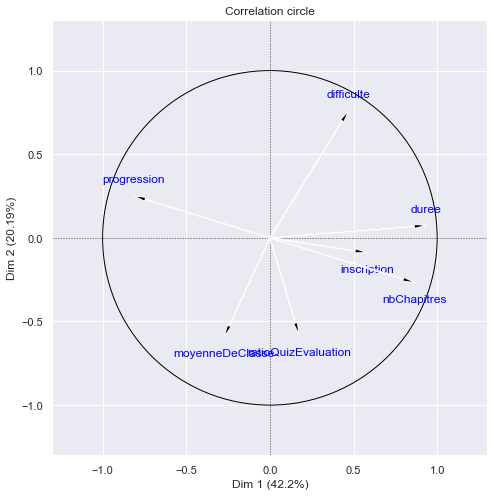

In [153]:
# Cercle des corrélations
# Les paramètres de la méthode correlation circle indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(10, 8))

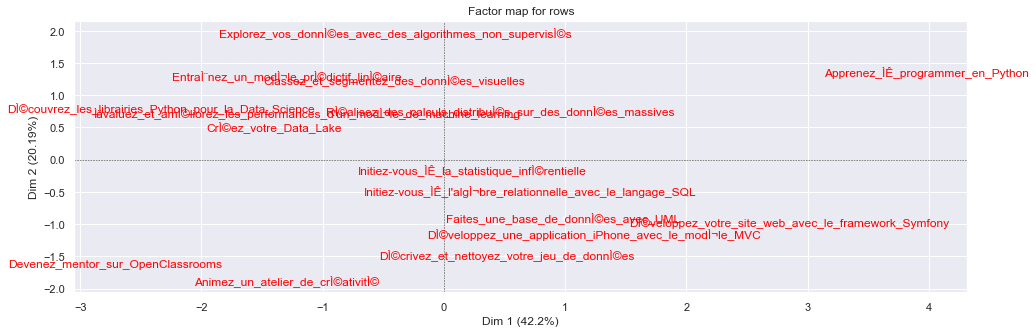

In [154]:
my_pca.mapping_row(num_x_axis=1, num_y_axis=2)

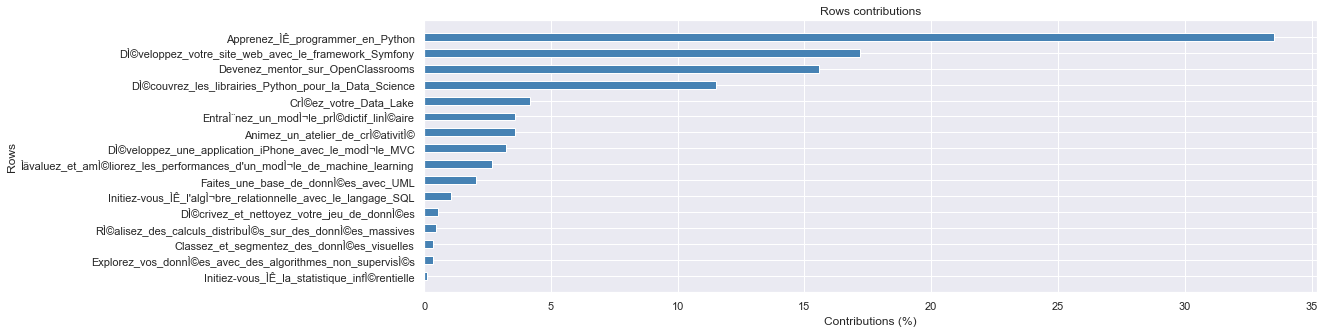

In [155]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_pca.plot_row_contrib(num_axis=1)

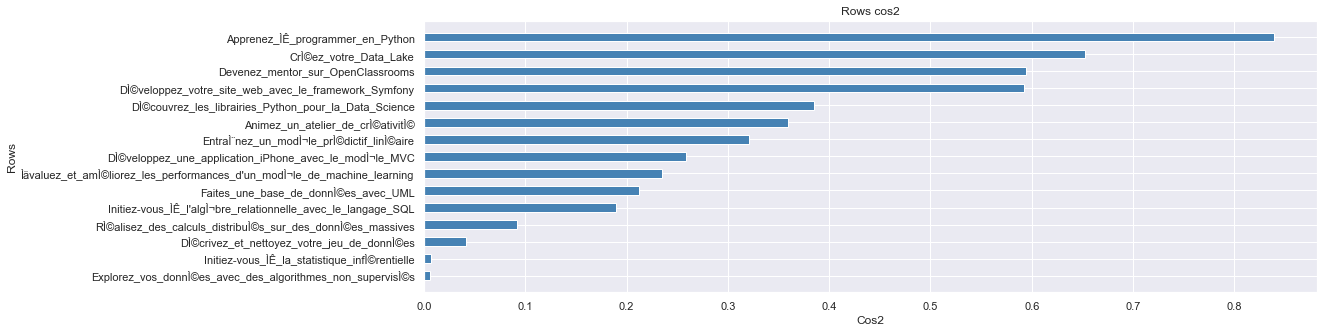

In [71]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_pca.plot_row_cos2(num_axis=1)

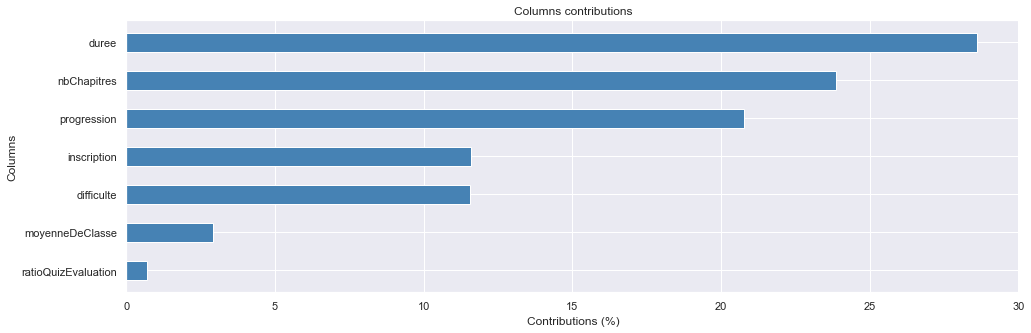

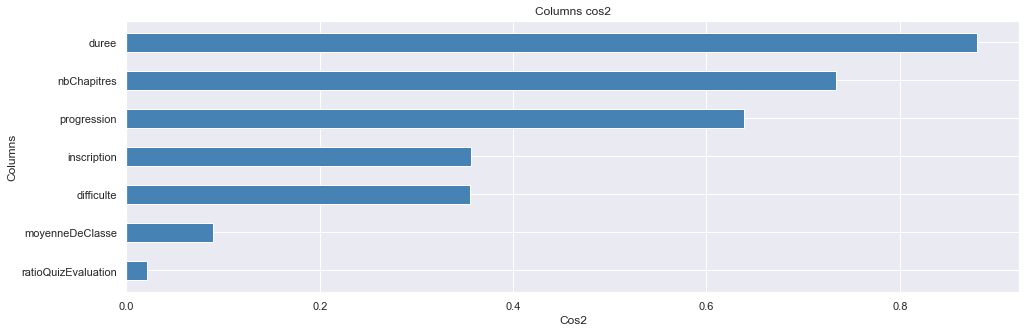

In [72]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_pca.plot_col_contrib(num_axis=1)

# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_pca.plot_col_cos2(num_axis=1)